## Initial Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Import time series data: Metrail dataset

In [2]:
data_metrail = pd.read_csv('Source Data/Metrail+dataset.csv', header=None)
data_metrail.columns = ['Month', 'Travellers']
data_metrail['Month'] = pd.to_datetime(data_metrail['Month'], format='%b-%y')
data_metrail = data_metrail.set_index('Month')
data_metrail.head(12)

,Travellers
Month,
1991-01-01,1724.0
1991-02-01,1638.0
1991-03-01,1987.0
1991-04-01,1825.0
1991-05-01,NaN
1991-06-01,1879.0
1991-07-01,1957.0
1991-08-01,2027.0
1991-09-01,1609.0


## Time series analysis

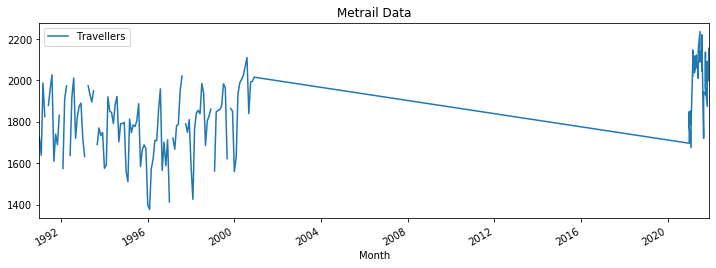

In [3]:
#Plot time series data
data_metrail.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Metrail Data')
plt.show(block=False)

## Missing Value Treatment

### Last observation carried forward

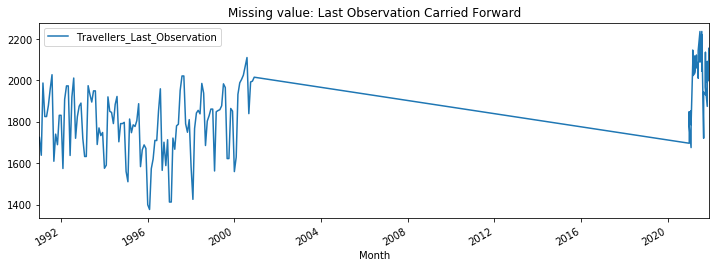

1838.685534591195


In [4]:
data_metrail = data_metrail.assign(Travellers_Last_Observation = data_metrail.Travellers.fillna(method='ffill'))
data_metrail[['Travellers_Last_Observation']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Missing value: Last Observation Carried Forward')
plt.show(block=False)

print(data_metrail.Travellers_Last_Observation.mean())

### Next value observation carried forward


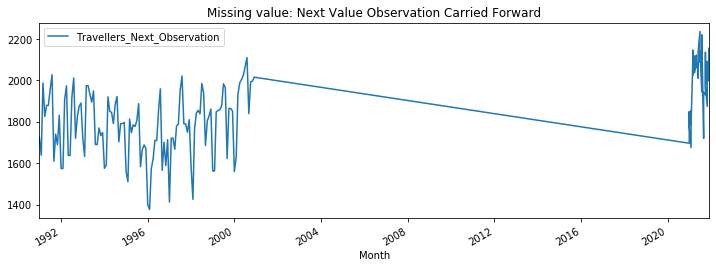

1834.446540880503


In [5]:
data_metrail = data_metrail.assign(Travellers_Next_Observation = data_metrail.Travellers.fillna(method='bfill'))
data_metrail[['Travellers_Next_Observation']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Missing value: Next Value Observation Carried Forward')
plt.show(block=False)

print(data_metrail.Travellers_Next_Observation.mean())

### Linear Interpolation

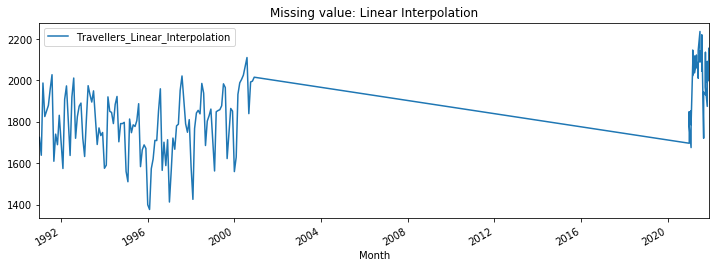

1836.566037735849


In [6]:
data_metrail = data_metrail.assign(Travellers_Linear_Interpolation = data_metrail.Travellers.interpolate(method='linear'))
data_metrail[['Travellers_Linear_Interpolation']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Missing value: Linear Interpolation')
plt.show(block=False)

print(data_metrail.Travellers_Linear_Interpolation.mean())